# Escape velocity

When an object such as a rokect or a spacecraft is under the gravitational influence of a body like the Earth, we can define the concept of $\textbf{escape velocity}$ $v_{escape}$ as: the velocity at which the object needs to be moving, in order to escape the gravitational pull of the object and no longer be bound to it.

In other words, if we are travelling at speeds $\textit{lower}$ than the $\textbf{escape velocity}$, the gravitational pull of the body will eventually slow us down and we'll starting follow back into its potential well. In contrast, if we are travelling at speed $\textit{greater}$ than the $\textbf{escape velocity}$, the gravitational potential of the body will not be able to slow us back down.

The formula for the escape velocity can be derived using the energy equation at a generic distance to the body $r$:

\begin{equation}
E = \frac{v^2}{2} - \frac{\mu}{r}
\end{equation}

If our speed is below the escape velocity, then we are gravitationally bound to the body so our energy must be negative ($E<0$), whereas if our speed is above the escape velocity, we are no longer bound and so our energy must be positive ($E>0$). Therefore, by definition, the escape velocity must be that which makes the energy balance exactly zero ($E=0$), so that:

\begin{equation}
v_{escape} = \sqrt{\frac{2 \mu}{r}}
\end{equation}

Recalling that the circular orbit velocity at any distance $r$ is given by $v_{circular} = \sqrt{\mu / r}$, we can conclude that the escape velocity is $\sqrt{2}$ times the velocity required to sustain a circular orbit at that distance. The formula is pretty intuitive and it tells us that to escape the gravitational influence of massive bodies (large $\mu$) we need to be travelling faster ($v$ grows with $\mu$) if we want to escape. Also, it tells us that the further away we are (large $r$) the easier it is to escape ($v$ decays with $r$), which means sense as the strength of the graviational attraction decays rapidly with distance.


To further illustrate the implications of the escape velocity we will look at how the trajectory of a rocket flying away from Earth looks like as a function of the initial velocity. Let us begin by computing the formal definition of the escape velocity at the surface of the Earth


In [1]:
import numpy as np
import matplotlib.pyplot as plt

MU_EARTH = 3.986e14      # Earth's Gravitational Parameter[m^3 / s^2]
R_EARTH = 6.3781e6       # Earth's radius [m]

V_ESCAPE = np.sqrt(2 * MU_EARTH / R_EARTH)
print("Earth's escape velocity is %.2f [km/s]" %(V_ESCAPE/1000))

Earth's escape velocity is 11.18 [km/s]


So a rocket departing from the surface of the Earth must be capable of producing a $\Delta V$ of at least 11.18 km/s if it intends to escape Earth's gravitational potential.

## The equation of motion

Now we will assume our rocket follows a perfectly vertical trajectory away from the surface of the Earth. This is not a very realistic way to bring a rocket up to orbit and then escape Earth's gravity, but it simplifies the equations quite a bit. We will further assume that the rocket achieves an initial speed $V_0$ after burning all its fuel, and that it simply "coasts" upwards under the influence of Earth graviational pull. Under such circumstances we can write the equation of motion as:


\begin{equation}
r(t) = R_{EARTH} + h(t)
\end{equation}

\begin{equation}
\frac{d^2r}{dt^2} = - \frac{\mu}{r^2}
\end{equation}

With initial conditions:
\begin{equation}
r(t=0) = R_{EARTH}
\end{equation}
\begin{equation}
\frac{dr}{dt}(t=0) = V_0
\end{equation}

We can simply use a numerical integrator to solve the evolution of height $h(t)$ and velocity $v(t)$ as a function of time.


In [2]:
from scipy.integrate import ode

def equation_of_motion(t, x):
    """
    X is the state vector containing both position (r)
    and velocity (v) at any given time (t)
    X = (r, v)
    
    Returns the derivative of the X vector, in this case:
    dX/dt = d(r, v)/dt = (v, a)
    """
    r, v = x[0], x[1]
    a = - MU_EARTH / r**2
    dxdt = np.array([v, a])
    return dxdt

def integrate_equations(alfa, N_t):
    """
    Solves the equation of motion for a given initial 
    velocity = alfa * V_ESCAPE
    N_t: Number of points in time to cover
    """
    
    v0 = alfa * V_ESCAPE
    x0 = np.array([R_EARTH, v0])
    
    # Define the Ordinary Differential Equation solver
    inte = ode(f=equation_of_motion)
    inte.set_integrator('dopri5')
    inte.set_initial_value(x0, t=0.)
    
    # Integrate the equation of motion
    t_step = 2.5    # Integration time in [s]
    times = np.linspace(0, t_step*N_t, N_t)
    heights, velocity = np.zeros(N_t), np.zeros(N_t)
    
    for (i, t) in enumerate(times):
        inte.integrate(t)
        res = inte.y
        h = (res[0] - R_EARTH) / 1000
        v = res[1] / 1000
        if h < 0:
            break
        else:
            heights[i] = h
            velocity[i] = v
        
    return times, heights, velocity
    

The cell above takes care of the numerical integration for you. Now we can try to run an example case, assuming an initial velocity $V_0= \alpha V_{escape}$ which is lower than the escape velocity ($\alpha<1$) and see what happens

/home/menduina-l/anaconda3/lib/python3.6/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


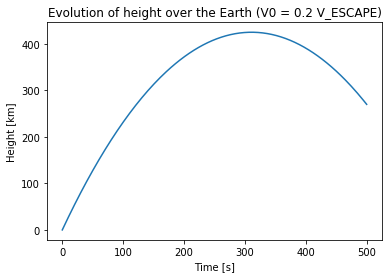

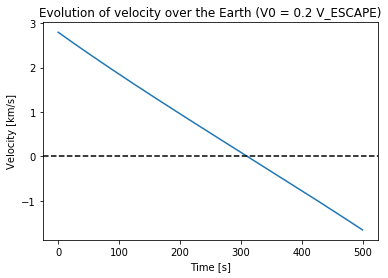

In [3]:
# Example assuming an initial velocity V_0 smaller than the Escape Velocity
alfa0 = 0.25

# Arrays containing the time t, the height h(t) and the velocity v(t)
time_example, h_example, v_example = integrate_equations(alfa0, N_t=200)
  
plt.figure()
plt.plot(time_example, h_example)
plt.xlabel('Time [s]')
plt.ylabel('Height [km]')
plt.title('Evolution of height over the Earth (V0 = %.1f V_ESCAPE)' %alfa0)
plt.show()

plt.figure()
plt.plot(time_example, v_example)
plt.axhline(y=0, linestyle='--', color='Black')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [km/s]')
plt.title('Evolution of velocity over the Earth (V0 = %.1f V_ESCAPE)' %alfa0)
plt.show()

The first figure shows the evolution of $\textbf{height}$ $h(t)$ over the surface of the Earth as a function of time. Although the plot looks similar to the profile of a parabolic flight, bear in mind that is not exactly the same situation, as the rocket is flying straight up, so there is no inclination angle over the surface. 

Once this is clear, we can see that because our initial velocity is lower than the escape velocity, the rocket eventually reaches a maximum height and starts to descend back due to Earth's gravitational pull

The second figure shows the evolution of $\textbf{velocity}$ $V(t)$ as a function of time. As the acceleration of gravity $g(r)$ remains approximately constant over this range of altitudes, the velocity profile looks like a linear $V(t) = V_0 - g t^2$ function. Earth consistently decelerates the rocket ($V$ decreases) until it stops and start to fall back down $V < 0$.

## Changing the initial velocity $V_0$

So far this is very intuitive result and it shows the behaviour we normally expect for objects being launched up in the air. Now let's vary the initial velocity $V_0 = \alpha V_{escape}$ ranging from values below to values above the escape velocity. For each case of $\alpha$ we integrate the equation of motion to get the time evolution of $h(t)$ and $v(t)$ and plot the results

/home/menduina-l/anaconda3/lib/python3.6/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


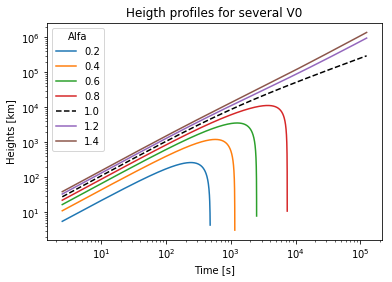

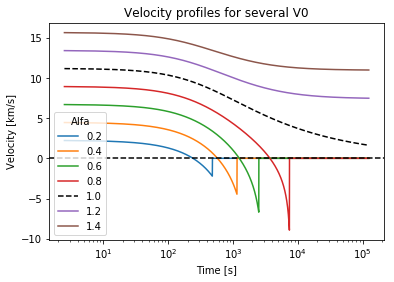

In [4]:
# Range Alpha from 0.2 to 1.4
alfas = np.arange(2, 16, 2)/10


h_max, v_list = [], []
plt.figure()
for alfa in alfas:
    t, h, v = integrate_equations(alfa, N_t=50000)
    h_max.append(h.max())
    v_list.append(v) 
    if alfa == 1.0:   # Adapt the style if V_0 = V_ESCAPE
        plt.plot(t, h, label=alfa, linestyle='--', color='Black')
    else:
        plt.plot(t, h, label=alfa)
# Store the velocities for more plots
velocities = np.stack(v_list, axis=-1)      
    
plt.yscale('log')
plt.xscale('log')
plt.legend(title='Alfa')
plt.xlabel('Time [s]')
plt.ylabel('Heights [km]')
plt.title('Heigth profiles for several V0')
plt.show()

plt.figure()
for i in range(len(h_max)):
    alfa = alfas[i]
    v = velocities[:,i]
    if alfa == 1.0:
        plt.plot(t, v, label=alfa, linestyle='--', color='Black')
    else:
        plt.plot(t, v, label=alfa)
    
# plt.yscale('log')
plt.xscale('log')
plt.axhline(y=0.0, linestyle='--', color='Black')
plt.legend(title='Alfa')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [km/s]')
plt.title('Velocity profiles for several V0')
plt.show()

Due to the large range of time and height values, the plots use logarithmic scales, but apart from that they are equivalent to the ones we have seen before. 

We can clearly observer that while $\alpha < 1$ the $\textbf{height}$ $h(t)$ reaches a maximum value $h_{max} (\alpha)$ and then it decreases. In the case of $\alpha \geq 1$ the height appears to increase monotonously, which is consistent with the idea of escape velocity.

The $\textbf{velocity}$ profile $v(t)$  is even more illustrative. When $\alpha < 1$ the speed decreases until it falls below 0 indicating that the rocket has reached it maximum height and has started descending. However for $\alpha=1$, $v(t)$ seems to approach a limit value of 0. This can easily be understood by looking at the energy balance:


\begin{equation}
E(r=\infty) = \frac{v_{\infty}^2}{2} - \frac{\mu}{\infty} = 0
\end{equation}

As the energy has to remain constant, if our $V_0 = V_{\text{ESCAPE}}$ then $E=0$ and it follows that $v_{\infty}=0$ which means that if we are travelling at the escape velocity, the gravitational pull of the planet will slow us down to 0 velocity. One can show that the amount of time required to reach that state is infinite $t=\infty$.

When $\alpha > 1$ such that our initial speed is larger than the escape velocity, the figure shows that the planet slows us down but we seem to reach a stable velocity larger than 0. This also follows from the energy balance. 

\begin{equation}
E(r=R_{\text{EARTH}}) = \frac{v_0^2}{2} - \frac{\mu}{R_{\text{EARTH}}} > 0
\end{equation}

\begin{equation}
E(r=\infty) = \frac{v_{\infty}^2}{2} - \frac{\mu}{\infty} > 0 
\end{equation}

\begin{equation}
E = \text{const} = E(r=R_{\text{EARTH}}) = E(r=\infty)
\end{equation}

\begin{equation}
\frac{v_{\infty}^2}{2} = \frac{v_0^2}{2} - \frac{\mu}{R_{\text{EARTH}}} > 0
\end{equation}

As in this case the energy of the rocket is greater than zero $E>0$, by conservation of energy we find that at $r=\infty$ we reach a stable velocity that is greater than zero.

## Conclusions

We have learned about the concept of $\textbf{escape velocity}$ and how it is derived from the equation of conservation of energy. We have complemented this knowledge with numerical results for rockets trying to escape Earth's gravitational potential at different initial velocities ($V_0 = \alpha V_{\text{ESCAPE}})$. We have seen that the energy balance at the initial state completely determines the time evolution of the rocket such that when $\alpha < 1$, $E<0$ and the rocket can't escape the pull of gravity. When $\alpha = 1$ $E=0$ and the rocket approaches a final speed of $V_{\infty}=0$ having successfully escaped Earth's gravitational well. And finally, when $\alpha > 1$, $E>0$ and the rocket reaches a finite speed $V_{\infty}>0$ and drifts away from the planet.